In [5]:
# 0. IMPORTS & SETTINGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)

# 0.1 LOAD DATA
DATA_PATH = "../data/loan_operational_risk_60000.csv"  # adjust path if needed

df = pd.read_csv(DATA_PATH, parse_dates=["application_date"])

print("Shape:", df.shape)
df.head()


Shape: (60000, 34)


,application_id,application_date,customer_age,customer_segment,region,channel,product_type,monthly_income,loan_amount,tenure_months,interest_rate,bureau_score,dti_ratio,docs_complete_flag,docs_missing_flag,kyc_issue_flag,data_entry_error_flag,system_error_count,manual_review_required,processing_time_hrs,sla_breach_flag,back_and_forth_count,fraud_flag,approval_channel,final_decision,limit_override_flag,booked_flag,ever_30dpd_6m,first_emi_missed_flag,churn_6m_flag,op_risk_event_flag,op_risk_category,tat_bucket,error_indicator_count
0,1,2023-06-04,41,Mass,East,DSA,Personal_Loan,27500,210000,84,16.89,581,0.64,0,1,0,0,0,1,44.9,1,1,0,Manual,Policy_Decline,1,0,0,0,0,1,Process_Delay,Slight_Delay,0
1,2,2023-12-03,41,Affluent,Metro,Online,Home_Loan,33900,2293000,24,7.21,758,1.50,0,1,0,0,0,0,20.0,0,0,0,Auto,Approved,0,1,0,0,0,0,NaN,Within_SLA,0
2,3,2023-09-20,26,Mass,Metro,Branch,Personal_Loan,33200,437000,84,13.53,752,1.10,1,0,0,0,0,0,20.3,0,0,0,Auto,Approved,0,0,0,0,0,0,NaN,Within_SLA,0
3,4,2023-08-06,50,Affluent,South,Online,Home_Loan,23300,3308000,24,7.13,683,1.50,1,0,0,0,0,1,24.6,1,1,0,Manual,Declined,0,0,0,0,0,0,NaN,Slight_Delay,0
4,5,2023-03-15,35,Mass,East,Branch,Home_Loan,47600,2785000,60,7.44,726,1.50,0,1,0,0,0,1,30.6,1,0,0,Manual,Approved,0,1,0,0,0,0,NaN,Slight_Delay,0


In [6]:
# 1.1 BASIC INFO
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   application_id          60000 non-null  int64         
 1   application_date        60000 non-null  datetime64[ns]
 2   customer_age            60000 non-null  int64         
 3   customer_segment        60000 non-null  object        
 4   region                  60000 non-null  object        
 5   channel                 60000 non-null  object        
 6   product_type            60000 non-null  object        
 7   monthly_income          60000 non-null  int64         
 8   loan_amount             60000 non-null  int64         
 9   tenure_months           60000 non-null  int64         
 10  interest_rate           60000 non-null  float64       
 11  bureau_score            60000 non-null  int64         
 12  dti_ratio               60000 non-null  float6

In [7]:
# 1.2 MISSING VALUES CHECK
df.isna().sum()


application_id                0
application_date              0
customer_age                  0
customer_segment              0
region                        0
channel                       0
product_type                  0
monthly_income                0
loan_amount                   0
tenure_months                 0
interest_rate                 0
bureau_score                  0
dti_ratio                     0
docs_complete_flag            0
docs_missing_flag             0
kyc_issue_flag                0
data_entry_error_flag         0
system_error_count            0
manual_review_required        0
processing_time_hrs           0
sla_breach_flag               0
back_and_forth_count          0
fraud_flag                    0
approval_channel              0
final_decision                0
limit_override_flag           0
booked_flag                   0
ever_30dpd_6m                 0
first_emi_missed_flag         0
churn_6m_flag                 0
op_risk_event_flag            0
op_risk_

In [8]:
# 1.3 QUICK STATS OF NUMERIC COLUMNS
df.describe().T


,count,mean,min,25%,50%,75%,max,std
application_id,60000.0,30000.5,1.0,15000.75,30000.5,45000.25,60000.0,17320.652413
application_date,60000,2023-07-15 05:34:19.200000,2023-01-01 00:00:00,2023-05-01 00:00:00,2023-07-23 00:00:00,2023-10-03 00:00:00,2023-12-28 00:00:00,NaN
customer_age,60000.0,42.450217,21.0,32.0,42.0,53.0,64.0,12.689018
monthly_income,60000.0,49764.341667,15000.0,18500.0,31800.0,57300.0,300000.0,46791.303627
loan_amount,60000.0,872783.733333,50000.0,192000.0,299000.0,1096000.0,5941000.0,1040315.440239
tenure_months,60000.0,69.3418,12.0,36.0,60.0,84.0,180.0,47.897459
interest_rate,60000.0,11.976352,6.5,8.97,12.17,14.63,20.0,3.269373
bureau_score,60000.0,719.149967,550.0,679.0,719.0,760.0,850.0,59.28646
dti_ratio,60000.0,0.920341,0.05,0.4,0.94,1.5,1.5,0.53745
docs_complete_flag,60000.0,0.799883,0.0,1.0,1.0,1.0,1.0,0.400091


In [9]:
for col in df.columns:
    print(col)


application_id
application_date
customer_age
customer_segment
region
channel
product_type
monthly_income
loan_amount
tenure_months
interest_rate
bureau_score
dti_ratio
docs_complete_flag
docs_missing_flag
kyc_issue_flag
data_entry_error_flag
system_error_count
manual_review_required
processing_time_hrs
sla_breach_flag
back_and_forth_count
fraud_flag
approval_channel
final_decision
limit_override_flag
booked_flag
ever_30dpd_6m
first_emi_missed_flag
churn_6m_flag
op_risk_event_flag
op_risk_category
tat_bucket
error_indicator_count


In [10]:
# 3.1 DERIVE MONTH & QUARTER
df["app_month"] = df["application_date"].dt.to_period("M").astype(str)
df["app_year_month"] = df["application_date"].dt.to_period("M").astype(str)
df["app_quarter"] = df["application_date"].dt.to_period("Q").astype(str)

df[["application_date", "app_month", "app_quarter"]].head()


,application_date,app_month,app_quarter
0,2023-06-04,2023-06,2023Q2
1,2023-12-03,2023-12,2023Q4
2,2023-09-20,2023-09,2023Q3
3,2023-08-06,2023-08,2023Q3
4,2023-03-15,2023-03,2023Q1


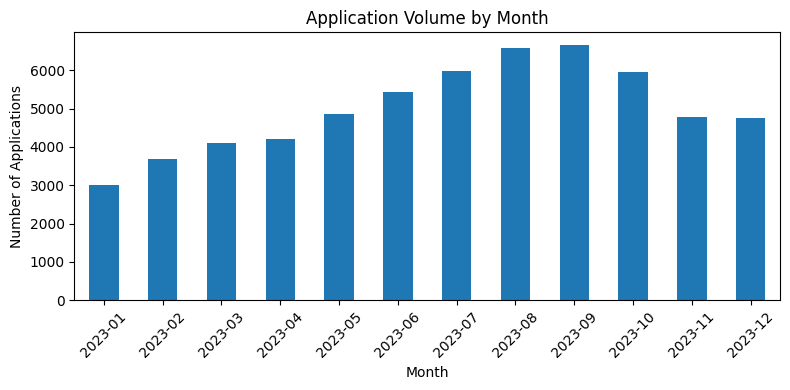

In [11]:
apps_by_month = df["app_year_month"].value_counts().sort_index()

plt.figure(figsize=(8,4))
apps_by_month.plot(kind="bar")
plt.title("Application Volume by Month")
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
print("Customer Segment Distribution (%):")
print((df["customer_segment"].value_counts(normalize=True) * 100).round(1))

print("\nProduct Type Distribution (%):")
print((df["product_type"].value_counts(normalize=True) * 100).round(1))

print("\nChannel Distribution (%):")
print((df["channel"].value_counts(normalize=True) * 100).round(1))

print("\nRegion Distribution (%):")
print((df["region"].value_counts(normalize=True) * 100).round(1))


Customer Segment Distribution (%):
customer_segment
Mass        69.6
Affluent    20.3
SME         10.2
Name: proportion, dtype: float64

Product Type Distribution (%):
product_type
Personal_Loan    55.0
Home_Loan        24.9
Auto_Loan        20.1
Name: proportion, dtype: float64

Channel Distribution (%):
channel
Branch    39.9
Online    30.0
DSA       20.2
Mobile     9.8
Name: proportion, dtype: float64

Region Distribution (%):
region
Metro    24.9
South    20.2
North    20.0
East     18.0
West     16.9
Name: proportion, dtype: float64


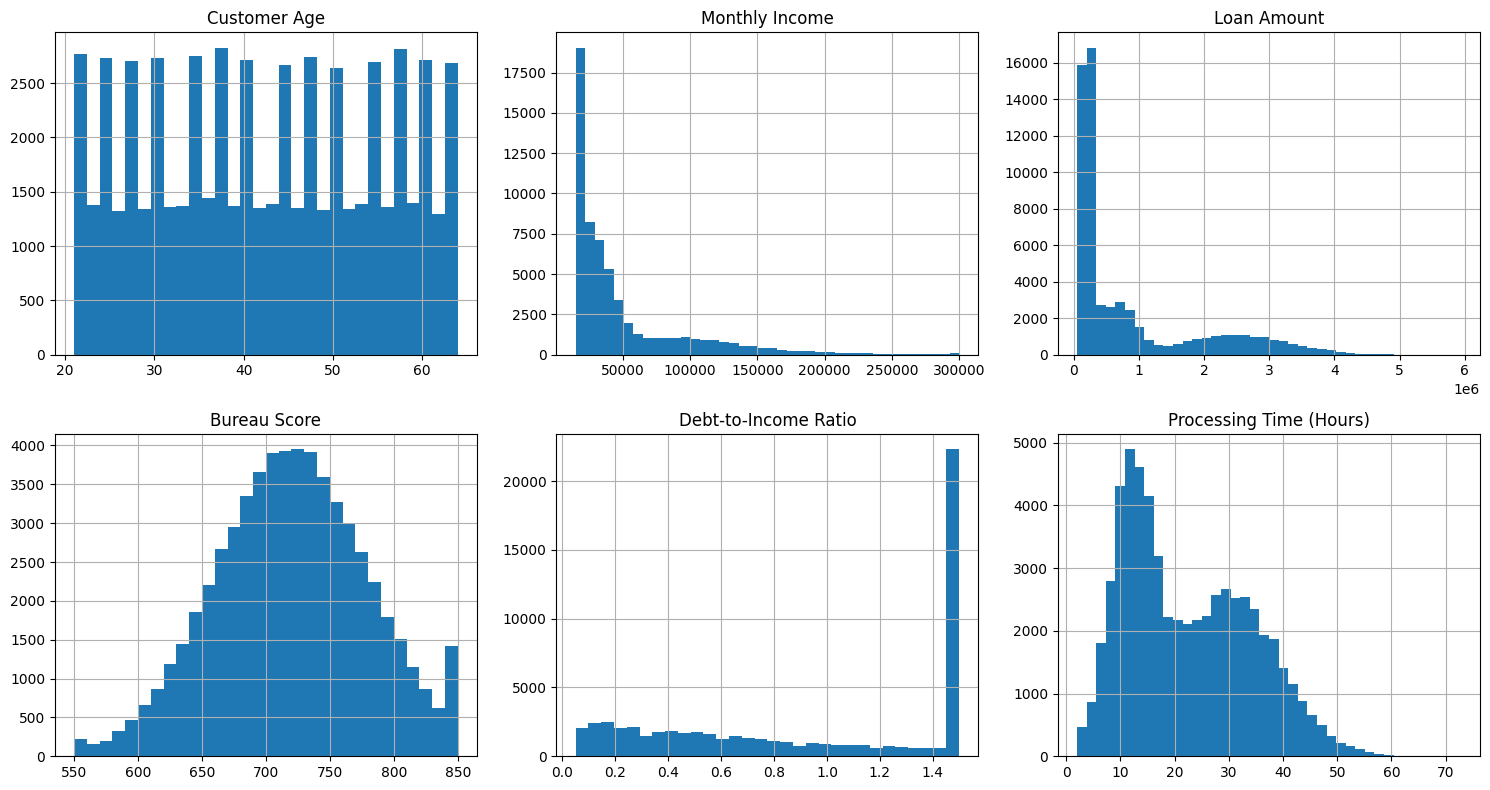

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))

df["customer_age"].hist(bins=30, ax=axes[0,0])
axes[0,0].set_title("Customer Age")

df["monthly_income"].hist(bins=40, ax=axes[0,1])
axes[0,1].set_title("Monthly Income")

df["loan_amount"].hist(bins=40, ax=axes[0,2])
axes[0,2].set_title("Loan Amount")

df["bureau_score"].hist(bins=30, ax=axes[1,0])
axes[1,0].set_title("Bureau Score")

df["dti_ratio"].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title("Debt-to-Income Ratio")

df["processing_time_hrs"].hist(bins=40, ax=axes[1,2])
axes[1,2].set_title("Processing Time (Hours)")

plt.tight_layout()
plt.show()


In [14]:
print("SLA Breach Rate overall:", df["sla_breach_flag"].mean().round(3))

df["tat_bucket"].value_counts(normalize=True).mul(100).round(1)


SLA Breach Rate overall: 0.424


tat_bucket
Within_SLA      57.6
Slight_Delay    40.8
Severe_Delay     1.6
Name: proportion, dtype: float64

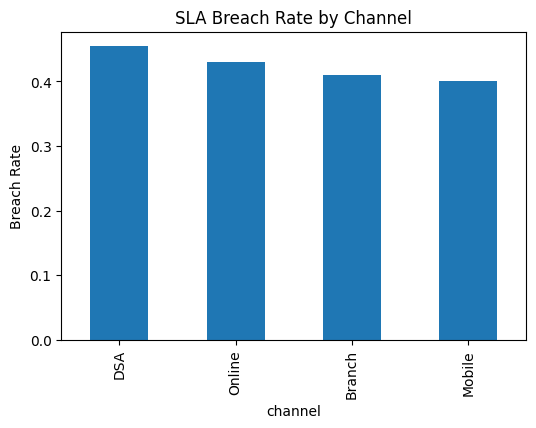

In [15]:
# SLA BREACH BY CHANNEL
sla_by_channel = df.groupby("channel")["sla_breach_flag"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sla_by_channel.plot(kind="bar")
plt.title("SLA Breach Rate by Channel")
plt.ylabel("Breach Rate")
plt.show()


<Figure size 600x400 with 0 Axes>

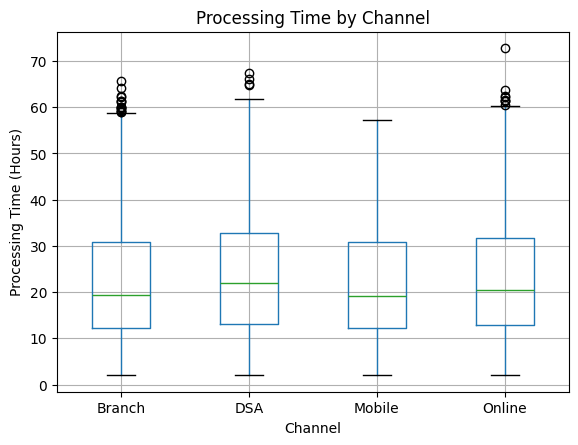

In [16]:
# PROCESSING TIME BY CHANNEL (BOXPLOT)
plt.figure(figsize=(6,4))
df.boxplot(column="processing_time_hrs", by="channel")
plt.title("Processing Time by Channel")
plt.suptitle("")
plt.xlabel("Channel")
plt.ylabel("Processing Time (Hours)")
plt.show()


In [17]:
print("Data Entry Error Rate:", df["data_entry_error_flag"].mean().round(3))
print("KYC Issue Rate:", df["kyc_issue_flag"].mean().round(3))
print("Fraud Flag Rate:", df["fraud_flag"].mean().round(3))


Data Entry Error Rate: 0.041
KYC Issue Rate: 0.033
Fraud Flag Rate: 0.013


In [18]:
kpi_cols = ["docs_missing_flag", "kyc_issue_flag", "data_entry_error_flag", "fraud_flag", "sla_breach_flag", "op_risk_event_flag"]
df[kpi_cols].mean().sort_values(ascending=False).round(3)

sla_breach_flag          0.424
docs_missing_flag        0.200
op_risk_event_flag       0.070
data_entry_error_flag    0.041
kyc_issue_flag           0.033
fraud_flag               0.013
dtype: float64

In [19]:
print("Operational Risk Event Rate:", df["op_risk_event_flag"].mean().round(3))

print("\nOp Risk Category Distribution (%):")
print((df["op_risk_category"].value_counts(normalize=True) * 100).round(1))


Operational Risk Event Rate: 0.07

Op Risk Category Distribution (%):
op_risk_category
Process_Delay     74.4
IT/Systems        14.9
Data_Quality       6.1
KYC/Compliance     3.2
Fraud_Miss         1.3
Name: proportion, dtype: float64


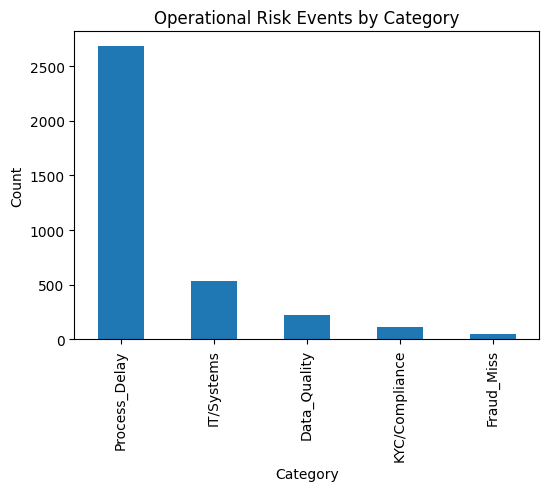

In [20]:
plt.figure(figsize=(6,4))
df["op_risk_category"].value_counts().plot(kind="bar")
plt.title("Operational Risk Events by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [21]:
op_by_channel = df.groupby("channel")["op_risk_event_flag"].mean().sort_values(ascending=False)
op_by_region = df.groupby("region")["op_risk_event_flag"].mean().sort_values(ascending=False)
op_by_product = df.groupby("product_type")["op_risk_event_flag"].mean().sort_values(ascending=False)

print("Op Risk Event Rate by Channel:")
print(op_by_channel.round(3))

print("\nOp Risk Event Rate by Region:")
print(op_by_region.round(3))

print("\nOp Risk Event Rate by Product:")
print(op_by_product.round(3))


Op Risk Event Rate by Channel:
channel
DSA       0.080
Online    0.073
Branch    0.066
Mobile    0.058
Name: op_risk_event_flag, dtype: float64

Op Risk Event Rate by Region:
region
South    0.073
East     0.072
North    0.071
West     0.068
Metro    0.066
Name: op_risk_event_flag, dtype: float64

Op Risk Event Rate by Product:
product_type
Home_Loan        0.079
Auto_Loan        0.074
Personal_Loan    0.065
Name: op_risk_event_flag, dtype: float64


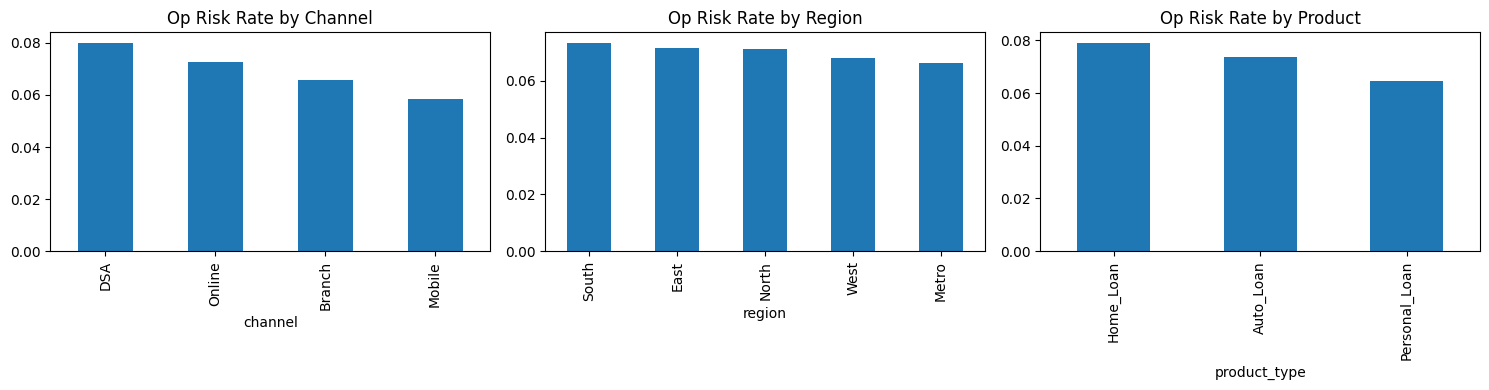

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

op_by_channel.plot(kind="bar", ax=axes[0])
axes[0].set_title("Op Risk Rate by Channel")

op_by_region.plot(kind="bar", ax=axes[1])
axes[1].set_title("Op Risk Rate by Region")

op_by_product.plot(kind="bar", ax=axes[2])
axes[2].set_title("Op Risk Rate by Product")

plt.tight_layout()
plt.show()


In [23]:
num_cols = [
    "customer_age","monthly_income","loan_amount","tenure_months","interest_rate",
    "bureau_score","dti_ratio","processing_time_hrs","system_error_count",
    "back_and_forth_count","error_indicator_count",
    "ever_30dpd_6m","first_emi_missed_flag","churn_6m_flag",
    "docs_missing_flag","kyc_issue_flag","data_entry_error_flag","fraud_flag",
    "sla_breach_flag","op_risk_event_flag"
]

corr = df[num_cols].corr()
corr_with_op = corr["op_risk_event_flag"].sort_values(ascending=False)
print("Correlation with op_risk_event_flag:")
corr_with_op


Correlation with op_risk_event_flag:


op_risk_event_flag       1.000000
sla_breach_flag          0.164524
processing_time_hrs      0.147175
error_indicator_count    0.120611
data_entry_error_flag    0.120478
kyc_issue_flag           0.091373
system_error_count       0.058691
docs_missing_flag        0.044568
fraud_flag               0.040575
back_and_forth_count     0.036083
dti_ratio                0.032258
loan_amount              0.026622
first_emi_missed_flag    0.005260
tenure_months            0.003191
ever_30dpd_6m            0.001139
customer_age             0.000160
churn_6m_flag           -0.003252
monthly_income          -0.012750
interest_rate           -0.022167
bureau_score            -0.022478
Name: op_risk_event_flag, dtype: float64

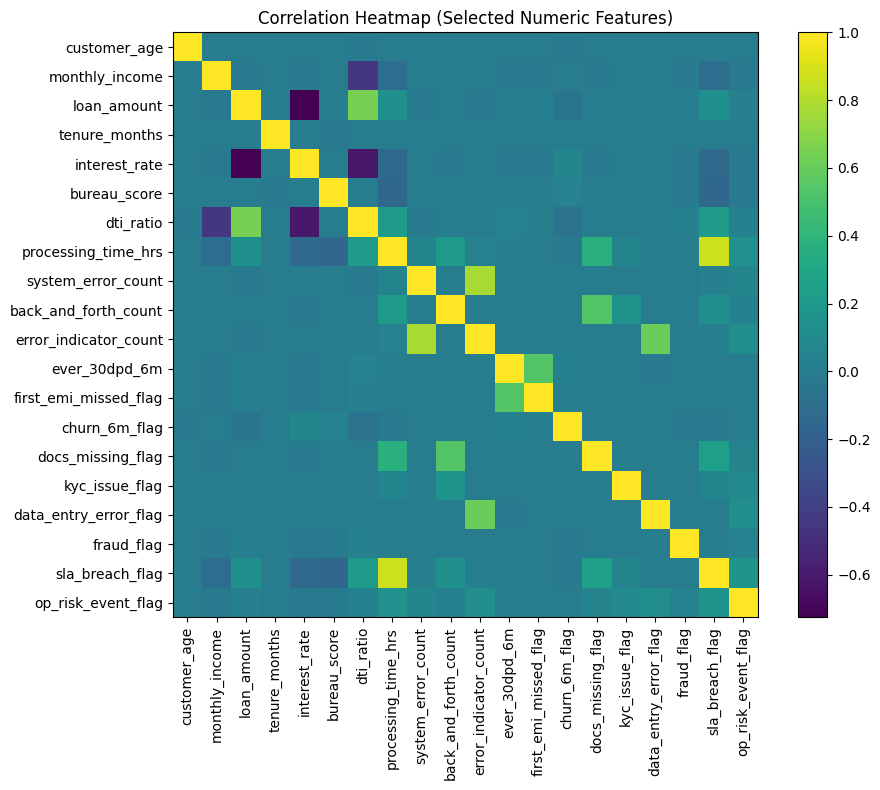

In [24]:
plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap (Selected Numeric Features)")
plt.colorbar()
plt.tight_layout()
plt.show()


In [25]:
group_dims = ["app_year_month", "channel"]

kri_summary = df.groupby(group_dims).agg(
    applications=("application_id", "count"),
    booked_loans=("booked_flag", "sum"),
    booked_rate=("booked_flag", "mean"),
    sla_breach_rate=("sla_breach_flag", "mean"),
    data_error_rate=("data_entry_error_flag", "mean"),
    kyc_issue_rate=("kyc_issue_flag", "mean"),
    fraud_flag_rate=("fraud_flag", "mean"),
    op_risk_event_rate=("op_risk_event_flag", "mean"),
    avg_processing_time=("processing_time_hrs", "mean"),
    avg_system_errors=("system_error_count", "mean"),
    avg_back_and_forth=("back_and_forth_count", "mean"),
    ever_30dpd_rate=("ever_30dpd_6m", "mean"),
    first_emi_miss_rate=("first_emi_missed_flag", "mean")
).reset_index()

kri_summary.head()


,app_year_month,channel,applications,booked_loans,booked_rate,sla_breach_rate,data_error_rate,kyc_issue_rate,fraud_flag_rate,op_risk_event_rate,avg_processing_time,avg_system_errors,avg_back_and_forth,ever_30dpd_rate,first_emi_miss_rate
0,2023-01,Branch,1238,729,0.588853,0.421648,0.037157,0.034733,0.012116,0.064620,22.323910,0.063005,0.794023,0.030695,0.010501
1,2023-01,DSA,586,327,0.558020,0.474403,0.049488,0.058020,0.011945,0.073379,23.879352,0.061433,1.020478,0.035836,0.008532
2,2023-01,Mobile,283,173,0.611307,0.402827,0.021201,0.035336,0.010601,0.060071,21.672085,0.049470,0.731449,0.035336,0.010601
3,2023-01,Online,889,507,0.570304,0.442070,0.038245,0.030371,0.012373,0.071991,23.216310,0.119235,0.832396,0.028121,0.008999
4,2023-02,Branch,1464,877,0.599044,0.413251,0.034153,0.025956,0.011612,0.073087,21.904850,0.052596,0.750000,0.036202,0.007514


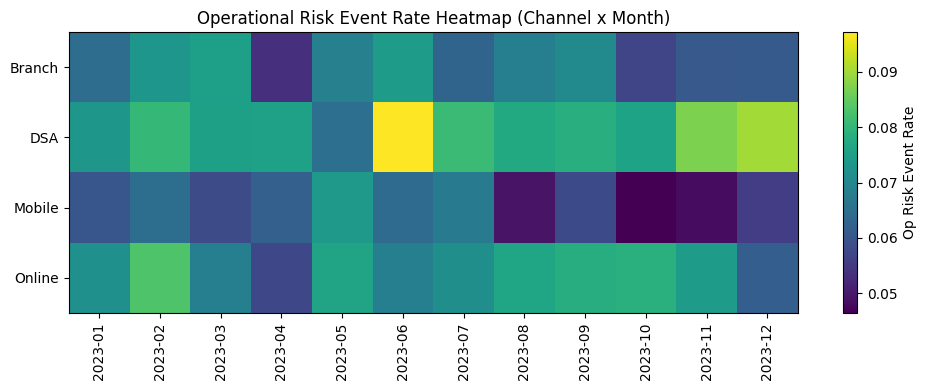

In [26]:
pivot_heat = kri_summary.pivot(index="channel", columns="app_year_month", values="op_risk_event_rate")

plt.figure(figsize=(10,4))
plt.imshow(pivot_heat, aspect="auto", interpolation="nearest")
plt.colorbar(label="Op Risk Event Rate")
plt.xticks(range(pivot_heat.shape[1]), pivot_heat.columns, rotation=90)
plt.yticks(range(pivot_heat.shape[0]), pivot_heat.index)
plt.title("Operational Risk Event Rate Heatmap (Channel x Month)")
plt.tight_layout()
plt.show()


In [27]:
# 9. RISK LEVEL BUCKET FOR KRI SUMMARY

def classify_risk(row):
    # basic rule-based risk scoring for demo:
    score = 0
    score += row["sla_breach_rate"] * 2
    score += row["data_error_rate"] * 2
    score += row["kyc_issue_rate"] * 2
    score += row["fraud_flag_rate"] * 3
    score += row["op_risk_event_rate"] * 3

    if score < 0.15:
        return "Low"
    elif score < 0.35:
        return "Medium"
    else:
        return "High"

kri_summary["risk_level"] = kri_summary.apply(classify_risk, axis=1)

kri_summary[["app_year_month","channel","risk_level"]].head()


,app_year_month,channel,risk_level
0,2023-01,Branch,High
1,2023-01,DSA,High
2,2023-01,Mobile,High
3,2023-01,Online,High
4,2023-02,Branch,High


In [28]:
# 10. SAVE AGGREGATED KRI TABLE
kri_output_path = "../data/loan_oprisk_kri_summary.csv"
kri_summary.to_csv(kri_output_path, index=False)
print("Saved KRI summary to:", kri_output_path)


Saved KRI summary to: ../data/loan_oprisk_kri_summary.csv
